In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
/kaggle/input/heart-attack-engineered-dataset-1/heart_attack_engineered_dataset_1.csv


In [2]:
heart_data = pd.read_csv("../input/heart-attack-engineered-dataset-1/heart_attack_engineered_dataset_1.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [4]:
# Split data in half, one training set, and one test set
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(columns=['output']),
                                                    heart_data['output'], 
                                                    test_size=0.5, 
                                                    random_state=125)

In [5]:
param_grid = {'C': [0.1,1, 10, 100, 1000, 5000, 10000, 20000], 
              'gamma': [1,0.1,0.01,0.001,0.0001, 0.00001, 0.000001], 
              'kernel': ['rbf']}

model = SVC()

grid = GridSearchCV(model,param_grid,refit=True,verbose=3, cv=10)

grid.fit(X_train,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV 1/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 6/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 7/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 8/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 9/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 10/10] END ...................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/10] END ..................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/10] END ..................C=0.1, gamma=0

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000, 10000, 20000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=3)

In [6]:
grid.best_params_

{'C': 20000, 'gamma': 1e-06, 'kernel': 'rbf'}

In [7]:
grid.best_estimator_

SVC(C=20000, gamma=1e-06)

In [8]:
# predictions = grid.predict(X_test)
model = SVC(C=10000, gamma=1e-05, kernel='rbf')

model.fit(X_test, y_test)

predictions = model.predict(X_test)

### Analysis of Performance

In [9]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        72
           1       0.83      0.91      0.87        80

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86      0.85       152



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Classifier Prediction')

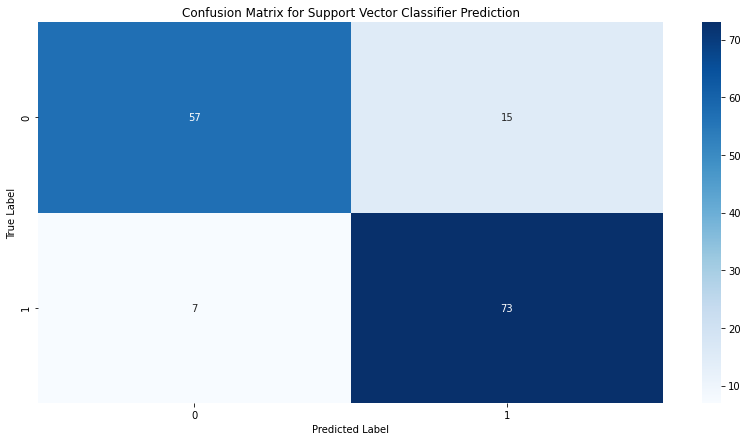

In [10]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(conf_matrix, annot=True, cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Support Vector Classifier Prediction")